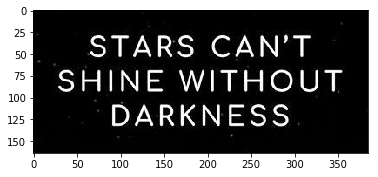

In [19]:
from skimage.measure import find_contours
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

orig_img = imread('resources/stars.jpg')
gray_img = rgb2gray(orig_img)
plt.imshow(gray_img,interpolation='nearest', cmap=plt.cm.gray)

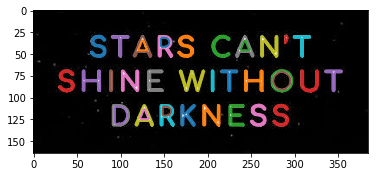

In [18]:
contours = find_contours(gray_img, 0.8)

fig, ax = plt.subplots()
ax.imshow(gray_img, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contours[n][:, 1], contours[n][:, 0], linewidth=2)

plt.show()

In [3]:
print len(contours)

37


In [4]:
import numpy as np

bounding_boxes = []

for contour in contours:
    Xmin = np.min(contour[:,0])
    Xmax = np.max(contour[:,0])
    Ymin = np.min(contour[:,1])
    Ymax = np.max(contour[:,1])
    
    bounding_boxes.append([Xmin, Xmax, Ymin, Ymax])

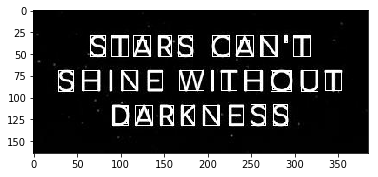

In [5]:
from skimage.draw import polygon, polygon_perimeter
with_boxes  = np.copy(gray_img)

for box in bounding_boxes:
    #[Xmin, Xmax, Ymin, Ymax]
    r = [box[0],box[1],box[1],box[0], box[0]]
    c = [box[3],box[3],box[2],box[2], box[3]]
    rr, cc = polygon_perimeter(r, c, with_boxes.shape)
    with_boxes[rr, cc] = 1 #set color white

plt.imshow(with_boxes, interpolation='nearest', cmap=plt.cm.gray)
plt.show()

37
(25, 20)


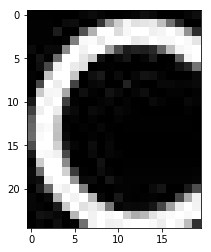

In [6]:
#extract the individual letters from the contours.
cut_boxes  = np.copy(gray_img)
box = bounding_boxes[0]
#[Xmin, Xmax, Ymin, Ymax]
objects = []
for box in bounding_boxes:
    #print box
    objects.append(cut_boxes[int(box[0]):int(box[1]), int(box[2]):int(box[3])])

print len(objects)
# index = 0
# for obj  in objects:
# cropped = objects[1]
cropped = objects[2]
print cropped.shape
plt.imshow(cropped, interpolation='nearest', cmap=plt.cm.gray)
plt.show()

In [7]:
import skimage as skimage

final_image = skimage.img_as_ubyte(np.array(range(30*5)).reshape(30,5) * 0)
for obj in objects:
    #dummy image
    arr = skimage.img_as_ubyte(np.array(range(30*30)).reshape(30,30) * 0)
    objimg = skimage.img_as_ubyte(obj)
    r, c = objimg.shape
    arr[:r,:c] = objimg
    final_image = np.hstack((final_image, arr))

/Users/muthukrishna/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:118: UserWarning: Possible sign loss when converting negative image of type int64 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/Users/muthukrishna/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:171: UserWarning: Downcasting int64 to uint8 without scaling because max value 0 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))
/Users/muthukrishna/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


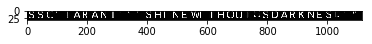

In [8]:
plt.imshow(final_image, cmap=plt.cm.gray)
plt.show()

In [9]:
# from skimage.io import imsave

# imsave('oup.jpg',final_image)

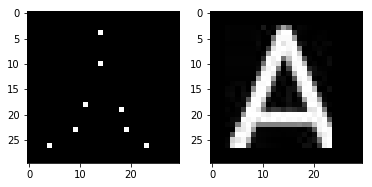

In [10]:
from skimage.feature import corner_harris, corner_peaks

arr = skimage.img_as_ubyte(np.array(range(30*30)).reshape(30,30) * 0)
objimg = skimage.img_as_ubyte(objects[5])
r, c = objimg.shape
arr[3:r+3,3:c+3] = objimg
    
sample = np.copy(arr)
coords = corner_peaks(corner_harris(sample))

# print sample

smthing = np.zeros(sample.shape)
for coord in coords:
    smthing[coord[0],coord[1]] = 1
plt.subplot(121)
plt.imshow(smthing, cmap=plt.cm.gray)
plt.subplot(122)
plt.imshow(sample, cmap=plt.cm.gray)
plt.show()

In [11]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='./')

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

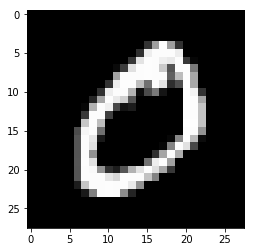

In [16]:
images = mnist.data
print images[0].reshape(28,28)
plt.imshow(images[0].reshape(28,28), cmap=plt.cm.gray)
plt.show()